Completed this project via DataCamp's Data Science Track. It practices skills including...
- Data Manipulation
- Data Visualization
- Probability and Statistics
- Importing and Cleaning Data
This project uses data scraped from the Google Play Store.

## **1. Google Play Store apps and reviews**
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>



### **Loading and Reviewing DataFrame**

In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3307,4175,A41 WatchFace for Android Wear Smart Watch,LIFESTYLE,4.5,231,5.7,"5,000+",Paid,$0.99,Everyone,Lifestyle,"December 24, 2017",7.0.1,4.3 and up
6797,7856,Radiology CT Anatomy,MEDICAL,4.2,345,14.0,"50,000+",Free,0,Everyone,Medical,"January 20, 2018",1.6,4.0 and up
8043,9163,Asphalt Xtreme: Rally Racing,GAME,4.5,567984,39.0,"10,000,000+",Free,0,Everyone,Racing,"July 16, 2018",1.7.3b,4.0.3 and up
8161,9281,EF/VR – VR Tours of EF Schools,FAMILY,3.6,17,15.0,"1,000+",Free,0,Teen,Education,"September 15, 2015",1.0.05,4.0 and up
6510,7563,"m, cm, mm to yard, feet, inch converter tool",TOOLS,4.3,246,2.8,"100,000+",Free,0,Everyone,Tools,"February 6, 2018",1.1,4.0 and up


- using `.sample()` was new way for me to explore data, I've mostly seen and used `.head()` and will definitely implement this in future projects!

## **2. Data cleaning**

- data cleaning = one of the most important steps in a data science project
- through our random sample we can see some details about our data that could possibly pose some issue for analysis
    - in our `Installs` column the numbers end in with '+'
    - `Price` further data exploration also shows use that the `Price` columns contain '$'
    - these details about our data make them non-numeric and therefore unable to analyze numerically
    - changing the format of these values by removing the unneeded characters will allow us to gain more insight from the data


In [2]:
apps['Price'].value_counts()

0          8903
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [3]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


### **Method for Removing Unwanted Characters**

In [4]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


- we use `.info()` to get a summary of how the data has been changed

### **Change Data Types**
- from using `.info()` we see that the `Installs` and `Price` columns have the object data type (because of the characters that we removed) so now we need to convert them to floats

In [5]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

# Convert Price to float data type
apps['Price'] = apps["Price"].astype(float)

# Checking dtypes of the apps dataframe
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## **4. Exploring app categories**

* Google introuduced grouping apps into categories which make apps more discoverable 
* now that data has been cleaned we're on to data exploration and some questions we want to answer
    * Which category has the highest share of (active) apps in the market? 
    * Is any specific category dominating the market?
    * Which categories have the fewest number of apps?

In [9]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


- we see that there are 33 categories for apps
- we also see that top 10 categories for applications are as follows (ordered from highest share of active apps to least)...
    1. FAMILY
    2. GAME
    3. TOOLS
    4. BUSINESS
    5. MEDICAL
    6. PERSONALIZATION
    7. PRODUCTIVITY
    8. LIFESTYLE
    9. FINANCE
    10. SPORTS
- on the other end of the spectrum the 5 categories with the least share of active apps...
    1. BEAUTY
    2. COMICS
    3. PARENTING 
    4. ART_AND_DESIGN
    5. EVENTS

## **5. Distribution of app ratings**
- now we want to see how the apps perform on average
    - app ratings are on a scale from 1 to 5, they are a KPI of an app and also lead to discoverability

In [10]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


- average volume of ratings across app categories is about `4.17`
- histogram => skewd left which means that most of the apps are rated highly and there's only a few low rated apps

## **6. Size and price of an app**
- now we want to explore app size and price and how these characteristics play a part the popularity/success of an app...
    - How can app developers effectively come up with strategies to size and price of their apps?
    - depending on the target market, price and app size can be very important to user
        - eg. when targeting users in developing nations the developers have to consider internet speeds of those countries as well as factors like exchange rate

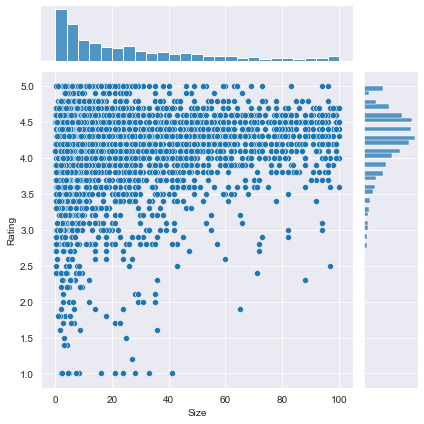

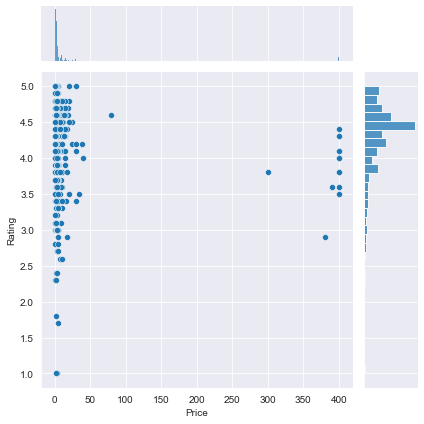

In [11]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

- here we use seaborn joint plots which are used to explain the relationship between 2 variables that make it easy to visualize and analyze this relationship and distribution
- to think further about app size and price we want to answer the following...
    - Does the size of an app affect its rating? 
        - from the first graph we can see that top rated apps (rating > 4) are between 2 MB - 20 MB in size
    - Do users really care about system-heavy apps or do they prefer light-weighted apps?
        - users to care about apps being "system-heavy" the plot at the top of the scatter plot for size and ratting show a right skewd distribution where most apps are less than 30 MB especially those that have higher ratings
    - Does the price of an app affect its rating?
        - the second graph shows that price absolutely has an effect rating, we see the most of the points exist between the price range 0-50 when most cost much less than 50
    - Do users always prefer free apps over paid apps?
        - we also see that users don't always prefer free over paid apps there are several outlier apps priced at 400 and their ratings are in the 3.5-4.5 range

## **7. Relation between app category and app price**
- companies and developers want to know how to maximize profit they have to consider how much user will actually pay
    - there has to be a balance between features provided and price
    - depending on the functionality of a app price may be justified, we will explore this concept further

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


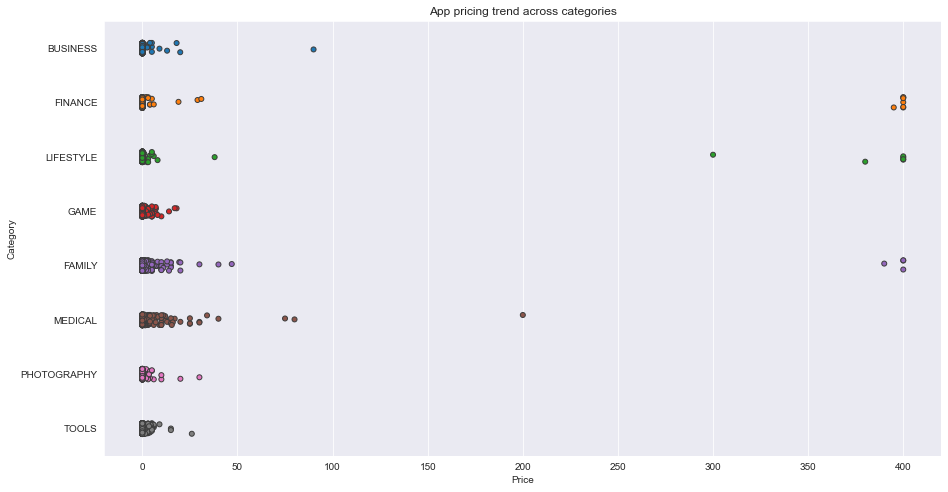

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

- here we see that while most prices per category stay in the range of $0-50 there are some outliers
- FINANCE, LIFESTYLE, AND FAMILY apps are the most expensive with prices as high as $400
- on the other hand, all of the apps in the GAME, PHOTOGRAPHY, AND TOOLS categories are below $50

## **8. Filter out "junk" apps**
- we also have to consider that there are apps that should be consider junk
    - some created by devs for practice or maliciously, they are high priced so they're sometime purchased by accident
- we can filter these apps out so that they don't taint our findings

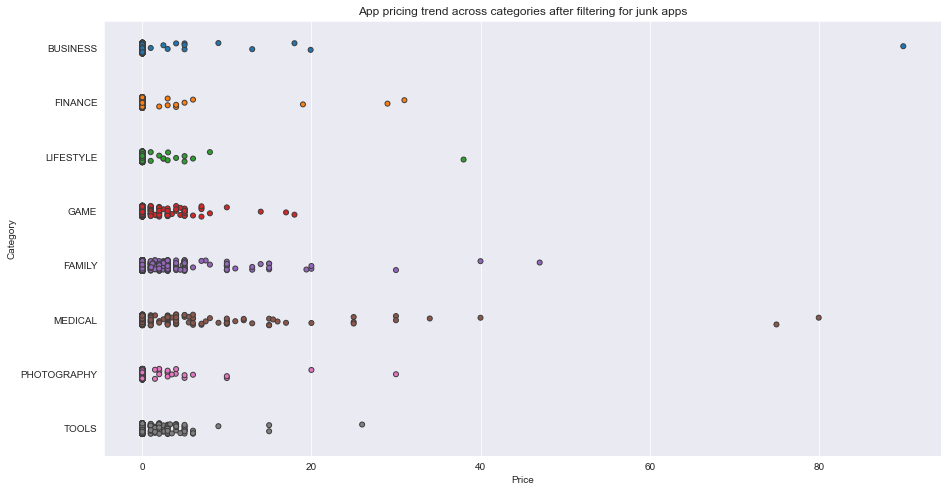

In [14]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data =apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps');

- by filtering for apps where the price is less than $100 we capture the majority of apps that users purchase/use

## **9. Popularity of paid apps vs free apps**
- there are five types of pricing strategies: free, paid, paymium, subscription,freemium
    - we're going to focus on free and paid 
- with free apps user gets...
    - free download
    - advertisements
    - other products by the apps' company the connect to the app
- with paid apps...
    - users pay once and download the app
    - users doesnt knoew the fully ability of the app until paying for it and downloading

In [15]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

- from the boxplots we can see that paid apps have a lower number of install that free apps but the difference between the too isn't as much as I thought it would be


## **10. Sentiment analysis of user reviews**
- final assessment of this data involved user review data
- this data shows how users feel about the product and can be review view sentiment analysis
- sentiment analysis = understanding the mood of text, whether is positive, negative or neutral
    - eg. negative word = 'hate', 'refund' and positive words = 'love', 'great'...and so on
- sentiment polarity score is a way of assess user comments about their experiences with the apps

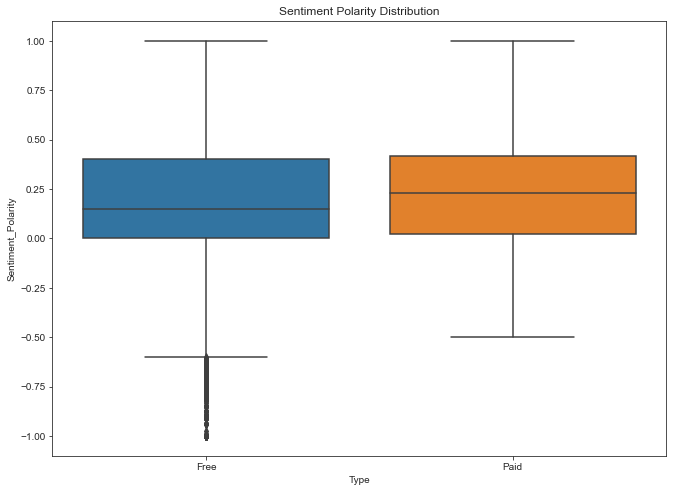

In [17]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on="App")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y ='Sentiment_Polarity', data =merged_df)
ax.set_title('Sentiment Polarity Distribution');

- this boxplot shows us that free apps have a lot more harsh/negative comment than paid apps
    - the negativity of the paid apps doesnt go below -.5 where as free apps sentiment polarity goes as low as -1
- the median polarity for paid apps is bit higher than that of free apps which could be an indicator that paid app have better quality overall than free app


## **Conclusion**

All the analyzes and finding can be used to help companies and app devs improve current apps. This information could also guide start ups and their devs towards making their new apps profitable.